Obtener del sitio web del DANE (https://www.dane.gov.co/index.php/estadisticas-por-tema/demografia-y-poblacion/proyecciones-de-poblacion) la estimación de la población de Colombia para el año 2016 por municipios y del sitio de Datos Abiertos de Colombia (https://www.datos.gov.co/Salud-y-Protecci-n-Social/SIVICAP-2016/rj6b-fmu2/data) los datos de calidad de agua potable para el consumo humano por municipios de Colombia. Realizar los siguientes procedimientos y análisis:

Organizar cada tabla en una hoja de Excel de Microsoft, una para cada grupo de datos, leer los datos y guardarlos en dos Data Frame distintos usando Pandas de Python

In [1]:
import pandas as pd

In [2]:
datos_pob=pd.read_excel("poblacion2016.xlsx",index=True)
datos_pob.shape

(1122, 4)

In [3]:
datos_pob.head()


,Departamento,Codigo,Municipio,Poblacion
0,Amazonas,91001,Leticia,41639
1,Amazonas,91263,El Encanto (ANM),4884
2,Amazonas,91405,La Chorrera (ANM),3933
3,Amazonas,91407,La Pedrera (ANM),5125
4,Amazonas,91430,La Victoria (ANM),1115


In [4]:
datos_agua=pd.read_excel("aguaPotable.xlsx",index=True)
datos_agua.shape

(1023, 3)

In [5]:
datos_agua.head()

,departamento,municipio,promedio_irca
0,Bolívar,Norosí,91.43
1,Nariño,Sapuyes,24.81
2,Norte de Santander,Chinácota,23.42
3,Norte de Santander,Bucarasica,29.39
4,Córdoba,Momil,3.35


Crear un nuevo Data Frame a partir de los dos creados en el punto anterior con un registro por cada municipio, y con las columnas de Nombre (Nombre del Municipio), Departamento (Departamento del municipio), Población (Población proyectada para el año 2016) e Indice de calidad del agua potable

In [6]:
datos=datos_agua.copy()

In [7]:
datos.shape

(1023, 3)

In [8]:
datos.iloc[0:2][["municipio","promedio_irca"]]

,municipio,promedio_irca
0,Norosí,91.43
1,Sapuyes,24.81


In [9]:
datos.head()

,departamento,municipio,promedio_irca
0,Bolívar,Norosí,91.43
1,Nariño,Sapuyes,24.81
2,Norte de Santander,Chinácota,23.42
3,Norte de Santander,Bucarasica,29.39
4,Córdoba,Momil,3.35


In [10]:
municipios_encontrados=0
municipios_faltantes=[]
poblacion_municipios=[]
for index, row in datos_agua.iterrows():
    municipio=row['municipio']
    departamento=row['departamento']
    poblacion=datos_pob.loc[datos_pob["Departamento"].str.contains(departamento, na=False)&
       datos_pob["Municipio"].str.contains(municipio, na=False)]['Poblacion']
    if poblacion.shape[0]>0:
        #print municipio,' ',poblacion.iloc[0]
        municipios_encontrados+=1
        poblacion_municipios.append(poblacion.iloc[0])
    else:
        municipios_faltantes.append(municipio)
        poblacion_municipios.append(15000)
print(municipios_encontrados)
   
for munic in municipios_faltantes:
    print (munic)


1023


In [11]:
datos['poblacion']=poblacion_municipios

In [12]:
datos.head()

,departamento,municipio,promedio_irca,poblacion
0,Bolívar,Norosí,91.43,5177
1,Nariño,Sapuyes,24.81,6237
2,Norte de Santander,Chinácota,23.42,16513
3,Norte de Santander,Bucarasica,29.39,4570
4,Córdoba,Momil,3.35,14962


In [13]:
datos.loc[datos["poblacion"]==15000]

,departamento,municipio,promedio_irca,poblacion
958,Caldas,Marquetalia,67.6,15000


In [14]:
datos.head()

,departamento,municipio,promedio_irca,poblacion
0,Bolívar,Norosí,91.43,5177
1,Nariño,Sapuyes,24.81,6237
2,Norte de Santander,Chinácota,23.42,16513
3,Norte de Santander,Bucarasica,29.39,4570
4,Córdoba,Momil,3.35,14962


Crear una tabla de frecuencia utilizando los rangos definidos para el IRCA. Rangos y puntajes de riesgo: Entre 0-5 se encuentra sin riesgo; el agua es apta para el consumo humano y se debe continuar la vigilancia, 5.1-14 se encuentra con nivel de riesgo bajo; el agua no es apta para el consumo humano y es susceptible de mejoramiento, 14.1-35 se encuentra en riesgo medio; el agua no es apta para el consumo humano, debe haber una gestión directa de la persona prestadora, 35.1-80 se encuentra en nivel de riesgo alto; el agua no es apta para el consumo humano, requiere de gestión directa de la persona prestadora y 80.1-100 se encuentra inviable sanitariamente; el agua se considera no apta para el consumo humano y requiere de una gestión directa de la persona prestadora. Realizar el histograma usando esta tabla de frecuencias.

In [15]:
bins_limits=[0,5,14,35,80,100]
intervals_name=[]
for i in range(len(bins_limits)-1):
    lim_inf=bins_limits[i]
    lim_sup=bins_limits[i+1]
    label='('+str(lim_inf)+","+str(lim_sup)+"]"
    intervals_name.append(label)
    print(label)
import numpy as np
indice_irca=datos['promedio_irca']
x_freq,x_bins=np.histogram(indice_irca,bins_limits)
print(x_freq)
print(x_bins)
dataFrameP3=pd.DataFrame.from_dict({'Intervals':intervals_name,'Frecuencia':x_freq})

(0,5]
(5,14]
(14,35]
(35,80]
(80,100]
[283 179 268 276  17]
[  0   5  14  35  80 100]


In [16]:
dataFrameP3

,Intervals,Frecuencia
0,"(0,5]",283
1,"(5,14]",179
2,"(14,35]",268
3,"(35,80]",276
4,"(80,100]",17


In [17]:
%matplotlib inline

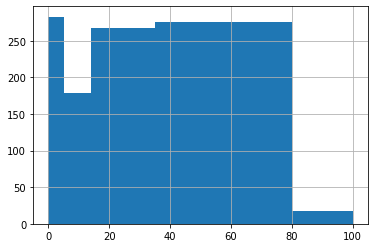

In [18]:
datos['promedio_irca'].hist(bins=bins_limits)

Clasificar los municipios de acuerdo al tamaño de su población en 5 categorías (es libre la definición de los rangos). Agregar una columna al Data Frame creado en el punto dos con esta clasificación. Usando este último Data Frame,  calcular la media, desviación estándar, primer y tercer cuartil del Indice de calidad del agua potable agrupado por cada una de las clasificaciones de los municipios acordes al tamaño de la población.

In [19]:
lim1=0
lim2=5000
lim3=10000
lim4=100000
lim5=1000000
lim6=8000000

datos["categoria"]=np.zeros(datos.shape[0]).tolist()
datos.loc[(datos.poblacion>lim1)&(datos.poblacion<=lim2),["categoria"]]=1
datos.loc[(datos.poblacion>lim2)&(datos.poblacion<=lim3),["categoria"]]=2
datos.loc[(datos.poblacion>lim3)&(datos.poblacion<=lim4),["categoria"]]=3
datos.loc[(datos.poblacion>lim4)&(datos.poblacion<=lim5),["categoria"]]=4
datos.loc[(datos.poblacion>lim5)&(datos.poblacion<=lim6),["categoria"]]=5


In [20]:
datos[datos.categoria==5].head()

,departamento,municipio,promedio_irca,poblacion,categoria
179,Antioquia,Medellín,1.43,2486723,5.0
455,Valle del Cauca,Cali,3.72,2394925,5.0
733,Atlántico,Barranquilla,0.00,1223616,5.0
822,Bogotá DC,Bogotá DC,7.35,7980001,5.0
897,Bolívar,Cartagena,0.01,1013389,5.0


In [21]:
datos.groupby('categoria')['promedio_irca'].count()

categoria
1.0    160
2.0    228
3.0    573
4.0     57
5.0      5
Name: promedio_irca, dtype: int64

In [22]:
datos.groupby('categoria')['promedio_irca'].mean()

categoria
1.0    23.413563
2.0    26.610658
3.0    23.496527
4.0    11.903509
5.0     2.502000
Name: promedio_irca, dtype: float64

In [23]:
datos.groupby('categoria')['promedio_irca'].std()

categoria
1.0    17.729723
2.0    23.067569
3.0    22.668677
4.0    15.594158
5.0     3.106682
Name: promedio_irca, dtype: float64

In [24]:
datos[datos['categoria']==1]['promedio_irca'].quantile([0.25,0.75])

0.25     8.1375
0.75    34.5500
Name: promedio_irca, dtype: float64

In [25]:
datos[datos['categoria']==2]['promedio_irca'].quantile([0.25,0.75])

0.25     5.345
0.75    44.205
Name: promedio_irca, dtype: float64

In [26]:
datos[datos['categoria']==3]['promedio_irca'].quantile([0.25,0.75])

0.25     3.87
0.75    40.52
Name: promedio_irca, dtype: float64

In [27]:
datos[datos['categoria']==4]['promedio_irca'].quantile([0.25,0.75])

0.25     1.40
0.75    16.19
Name: promedio_irca, dtype: float64

In [28]:
datos[datos['categoria']==5]['promedio_irca'].quantile([0.25,0.75])

0.25    0.01
0.75    3.72
Name: promedio_irca, dtype: float64

Entre más pequeño el municipio mayor el irca, los municipios más grandes tienen mejor agua potable aunque la dispersión es muy similar a partir de la segunda categoría. El 75% al menos de los municipios grandes tienen un indice bajo 8. Una curata parte de los municipios aproximadamente se encuentran con riesgo bajo.

In [29]:
datos[datos.categoria==5]

,departamento,municipio,promedio_irca,poblacion,categoria
179,Antioquia,Medellín,1.43,2486723,5.0
455,Valle del Cauca,Cali,3.72,2394925,5.0
733,Atlántico,Barranquilla,0.00,1223616,5.0
822,Bogotá DC,Bogotá DC,7.35,7980001,5.0
897,Bolívar,Cartagena,0.01,1013389,5.0
